In [33]:
import pandas as pd
import datetime
from datetime import time
import folium
from folium import plugins
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns

df_accidents = pd.read_csv('dft-road-casualty-statistics-accident-2019.csv', low_memory=False)
df_casualty = pd.read_csv('dft-road-casualty-statistics-casualty-2019.csv', low_memory=False)
df_vehicle = pd.read_csv('dft-road-casualty-statistics-vehicle-2019.csv', low_memory=False)


df_accidents['Datetime'] = df_accidents['date'] + ' ' + df_accidents['time']


df_accidents['Datetime'] = pd.to_datetime(df_accidents['Datetime'])

df_accidents = df_accidents.set_index(pd.DatetimeIndex(df_accidents['Datetime']))
df_accidents = df_accidents.sort_index()

df_accidents = df_accidents.dropna()

In [34]:


uk_heat_map = folium.Map(location=[52.5074, 0.1178], zoom_start = 6) 

map_df = df_accidents[['latitude', 'longitude']]

map_df = map_df.dropna(axis=0, subset=['latitude','longitude'])

heat_data = [list(rows) for rows in zip(map_df['latitude'].values, map_df['longitude'].values)]

#
HeatMap(heat_data,blur=2, radius=2).add_to(uk_heat_map)

# 
uk_heat_map


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '2019-01-31'),
  Text(1, 0, '2019-02-28'),
  Text(2, 0, '2019-03-31'),
  Text(3, 0, '2019-04-30'),
  Text(4, 0, '2019-05-31'),
  Text(5, 0, '2019-06-30'),
  Text(6, 0, '2019-07-31'),
  Text(7, 0, '2019-08-31'),
  Text(8, 0, '2019-09-30'),
  Text(9, 0, '2019-10-31'),
  Text(10, 0, '2019-11-30'),
  Text(11, 0, '2019-12-31')])

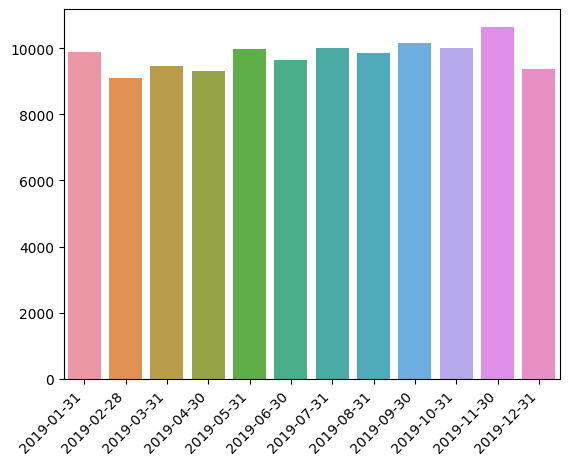

In [35]:
day_count_accidents = df_accidents["Datetime"].resample('1M').count()

sns.barplot(x=day_count_accidents.index.date, y=day_count_accidents.values)
plt.xticks(rotation=45, ha="right")

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

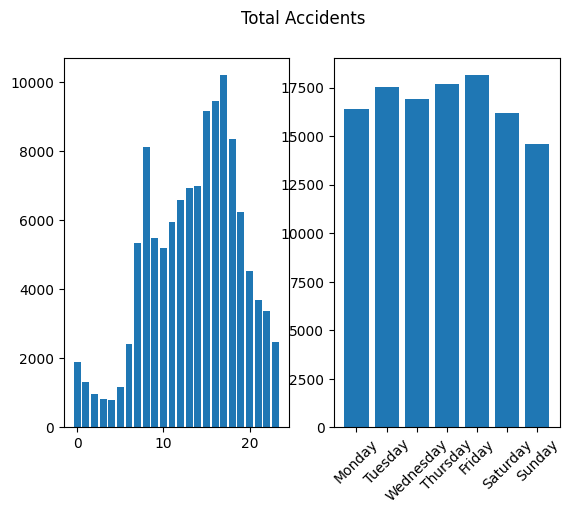

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Total Accidents')

# hourly
hour_count_accidents = df_accidents["Datetime"].resample('1h').count()
hour = df_accidents["Datetime"].groupby([df_accidents["Datetime"].dt.hour]).count()

# week ca
hour_count_accidents = df_accidents["Datetime"].resample('1h').count()

idk = df_accidents["Datetime"].groupby([df_accidents["Datetime"].dt.weekday]).count()

day_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

ax1.bar(hour.index, hour.values)
ax2.bar(idk.index.map(day_map), idk.values)

plt.xticks(rotation=45)

In [37]:
idk.index

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='Datetime')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

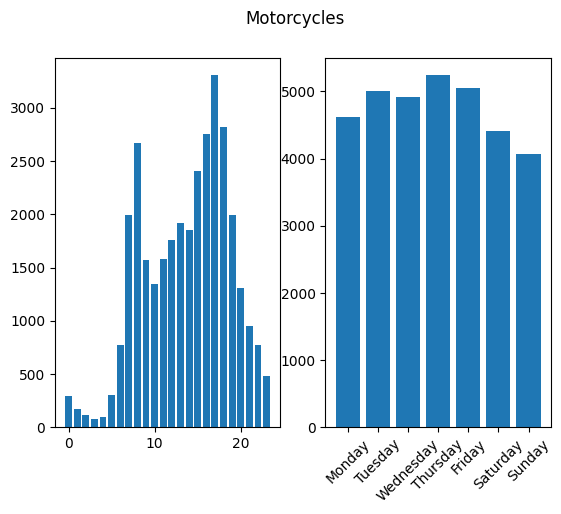

In [38]:
motorcycles = df_vehicle[df_vehicle['vehicle_type'].isin([1, 2, 3, 4, 5])]['accident_index'].unique()

motorcylces_accidents = df_accidents[df_accidents['accident_index'].isin(motorcycles)]


hour_count_accidents_motorcycles = motorcylces_accidents["Datetime"].resample('1h').count()
hour_grouped_motorcycles = motorcylces_accidents["Datetime"].groupby([motorcylces_accidents["Datetime"].dt.hour]).count()


day_motorcyles_accidents = motorcylces_accidents["Datetime"].groupby([motorcylces_accidents["Datetime"].dt.weekday]).count()


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Motorcycles')


ax1.bar(hour_grouped_motorcycles.index, hour_grouped_motorcycles.values)


ax2.bar(day_motorcyles_accidents.index.map(day_map), day_motorcyles_accidents.values)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

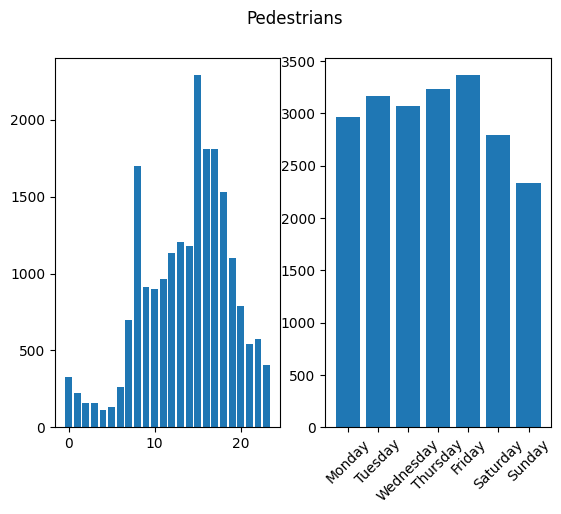

In [75]:
# get all accidents with pedestrians
pedestrians = df_casualty[df_casualty['casualty_class'] == 3]['accident_index'].values
pedestrian_df = df_accidents[df_accidents['accident_index'].isin(pedestrians)]

# count all accidents for each hour of the day
total_hour_pedestrians_accidents = pedestrian_df["Datetime"].groupby([pedestrian_df["Datetime"].dt.hour]).count()

# count all accidents by day of the week

day_pedestrian_accidents = pedestrian_df["Datetime"].groupby([pedestrian_df["Datetime"].dt.weekday]).count()



fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Pedestrians')


ax1.bar(total_hour_pedestrians_accidents.index, total_hour_pedestrians_accidents.values)
ax2.bar(day_pedestrian_accidents.index.map(day_map), day_pedestrian_accidents.values)
plt.xticks(rotation=45)



In [40]:
# daylight savings

In [41]:
 df_accidents['Datetime']

Datetime
2019-01-01 00:06:00   2019-01-01 00:06:00
2019-01-01 00:20:00   2019-01-01 00:20:00
2019-01-01 00:28:00   2019-01-01 00:28:00
2019-01-01 00:30:00   2019-01-01 00:30:00
2019-01-01 00:34:00   2019-01-01 00:34:00
                              ...        
2019-12-31 23:42:00   2019-12-31 23:42:00
2019-12-31 23:45:00   2019-12-31 23:45:00
2019-12-31 23:45:00   2019-12-31 23:45:00
2019-12-31 23:50:00   2019-12-31 23:50:00
2019-12-31 23:53:00   2019-12-31 23:53:00
Name: Datetime, Length: 117508, dtype: datetime64[ns]

In [42]:
# sunrise sunset
def detect_sun(row):
    latitude =  row['latitude']
    longitude = row['longitude']
    
    sun = Sun(latitude, longitude)
        
    date = row['Datetime']
    
    try:
        day_sun_rise = sun.get_local_sunrise_time(date).replace(tzinfo=None) 
        day_sun_set = sun.get_local_sunset_time(date).replace(tzinfo=None) 
        
    except ValueError:
        return 'Neither'

    sunset_diff = day_sun_set - date
    sunrise_diff = day_sun_rise - date

    # 
    minutes_since_sunrise = abs(int(sunset_diff.total_seconds() / 60))
    minutes_since_sunset = abs(int(sunrise_diff.total_seconds() / 60))
    
    if minutes_since_sunrise < 20:
        return 'Sunrise'
    elif minutes_since_sunset < 20:
        return 'Sunset'
    else:
        return 'Neither'
    



from suntime import Sun, SunTimeException


df_accidents['SunsetSunrise'] = df_accidents.apply(detect_sun, axis=1)
df_accidents['SunsetSunrise'].value_counts()

Neither    111434
Sunrise      3918
Sunset       2156
Name: SunsetSunrise, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Fine no high winds'),
  Text(1, 0, 'Raining no high winds'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Raining + high winds'),
  Text(5, 0, 'Fine + high winds'),
  Text(6, 0, 'Fog or mist'),
  Text(7, 0, 'Snowing no high winds'),
  Text(8, 0, 'Snowing + high winds')])

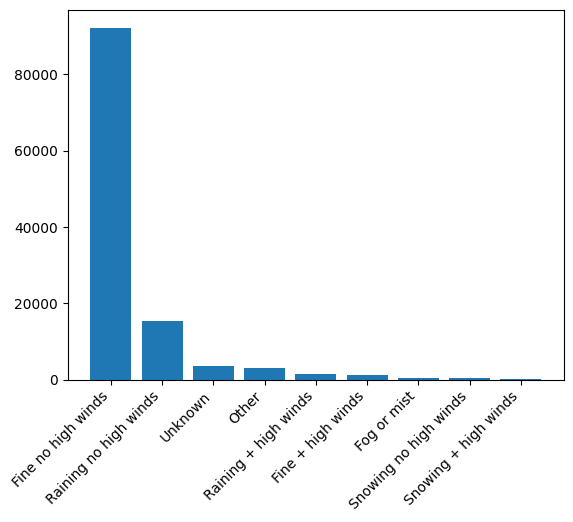

In [43]:
# weather conditions

weather_conditions_map = {
    1: 'Fine no high winds',
    2: 'Raining no high winds',
    3: 'Snowing no high winds',
    4: 'Fine + high winds',
    5: 'Raining + high winds',
    6: 'Snowing + high winds',
    7: 'Fog or mist',
    8: 'Other',
    9: 'Unknown'    
}


conditions = df_accidents["weather_conditions"].value_counts()

plt.bar(conditions.index.map(weather_conditions_map), conditions.values)
plt.xticks(rotation=45, ha="right")

In [68]:
from geopy.distance import great_circle as GRC

def distance_from_cords(row, manchester_cords):
    cur_cords = (row['latitude'], row['longitude'])
    return GRC(cur_cords, manchester_cords).km 

manchester_cords = (53.4808, -2.2426)

df_accidents['distance_from_manchester'] = df_accidents.apply(distance_from_cords, args=[manchester_cords],  axis=1)

df_accidents

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Datetime,SunsetSunrise,distance_from_manchester
Datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:06:00,2019320634369,2019,320634369,521429.0,321970.0,-0.201080,52.781682,32,2,2,...,1,0,0,1,1,2,E01026262,2019-01-01 00:06:00,Neither,156.815678
2019-01-01 00:20:00,2019010155220,2019,010155220,527068.0,179060.0,-0.170889,51.496210,1,3,3,...,1,0,0,1,1,2,E01002821,2019-01-01 00:20:00,Neither,261.460297
2019-01-01 00:28:00,2019350810982,2019,350810982,546094.0,310917.0,0.159444,52.676285,35,3,2,...,1,0,0,1,1,2,E01018108,2019-01-01 00:28:00,Neither,183.689191
2019-01-01 00:30:00,2019230353185,2019,230353185,441395.0,290046.0,-1.391543,52.506762,23,2,1,...,1,0,0,2,1,2,E01031182,2019-01-01 00:30:00,Neither,122.370684
2019-01-01 00:34:00,2019070000684,2019,070000684,375062.0,384963.0,-2.376181,53.360964,7,2,1,...,1,0,0,2,1,1,E01018648,2019-01-01 00:34:00,Neither,15.997275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:42:00,2019980938595,2019,980938595,297884.0,560228.0,-3.594977,54.926262,98,2,1,...,1,0,0,2,1,-1,-1,2019-12-31 23:42:00,Neither,183.213008
2019-12-31 23:45:00,2019010228016,2019,010228016,525483.0,183558.0,-0.192109,51.536988,1,3,1,...,2,0,9,1,3,2,E01000930,2019-12-31 23:45:00,Neither,256.832038
2019-12-31 23:45:00,2019420914629,2019,420914629,574423.0,213086.0,0.527620,51.789244,42,2,2,...,2,0,0,2,1,2,E01021537,2019-12-31 23:45:00,Neither,265.154237


In [77]:
df_manc_accidents = df_accidents[df_accidents['distance_from_manchester'] < 5]

<BarContainer object of 363 artists>

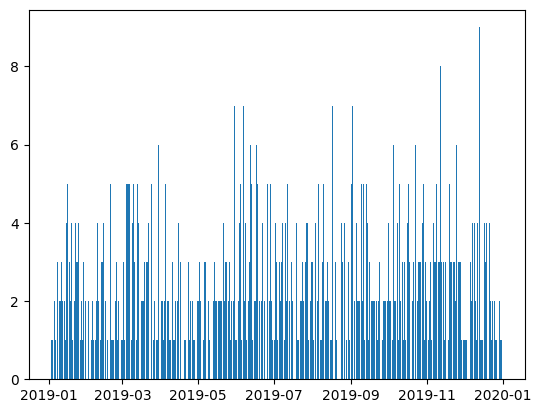

In [81]:
va = df_manc_accidents.resample('1D').count()['accident_index']

plt.bar(va.index, va.values)

In [67]:
df_accidents.iloc[66310]

accident_index                                       2019360865563
accident_year                                                 2019
accident_reference                                       360865563
location_easting_osgr                                     627459.0
location_northing_osgr                                    338822.0
longitude                                                 1.380425
latitude                                                 52.898709
police_force                                                    36
accident_severity                                                2
number_of_vehicles                                               2
number_of_casualties                                             1
date                                                    28/07/2019
day_of_week                                                      1
time                                                         07:43
local_authority_district                                      